# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/hot_rod.mp4"

## Task 1: Define generator for reading video

In [1]:
def get_frames(filename):
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        ret,frame=video.read()
        if ret:
            yield frame
        else:
            break
        video.release()
        yield None

## Task 2: Retrieve and display video frames

In [4]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow('frame',f)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

## Task 2: Define function to get a single video frame

In [10]:
def get_frame(filename,index):
    counter=0
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        ret,frame=video.read()
        if ret:
            if counter==index:
                return frame
            counter +=1
        else:
            break
    video.release()
    return None

## Task 2: Examining pixels

In [13]:
frame = get_frame(VFILE,80)
print('shape', frame.shape)
print('pixel at (0,0)',frame[0,0,:])
print('pixel at (120,10)',frame[120,10,:])

shape (480, 640, 3)
pixel at (0,0) [47 19  0]
pixel at (120,10) [154 120  78]


## Task 2: Displaying a video frame

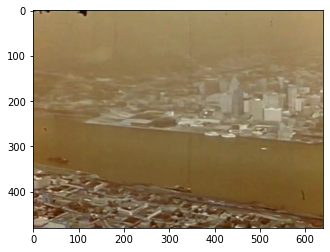

In [14]:
plt.imshow(frame)

## Task 3: Fixing color convention

pixel at (0,0) [ 0 19 47]


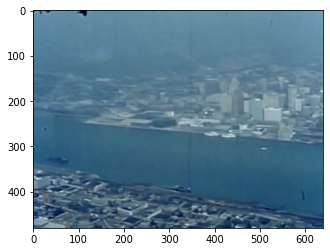

In [17]:
fix_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print('pixel at (0,0)',fix_frame[0,0,:])
plt.imshow(fix_frame)

## Task 3: Cropping a video frame

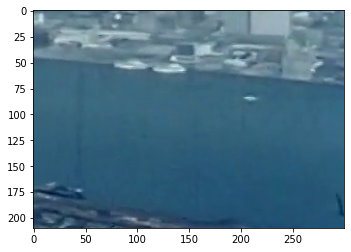

In [18]:
plt.imshow(fix_frame[220:430,300:600])

## Task 3: Adjusting Brightness

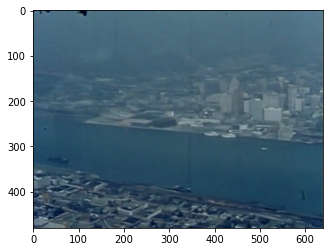

In [21]:
darker=0.8*fix_frame
darker=darker.astype(np.uint8)
plt.imshow(darker)

## Task 4: Drawing a circle

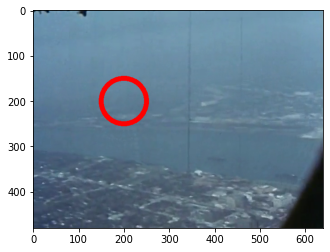

In [23]:
frame=get_frame(VFILE,200)
cv2.circle(frame, center = (200,200),radius=50,color=(0,0,255),thickness=10)
fixed_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

## Task 4: Processing an entire video

In [26]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,text=str(counter), org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    cv2.imshow('frame',frame)
    if cv2.waitKey(10)==27:
        break
    counter +=1
cv2.destroyAllWindows()

## Task 5: Generating a new video file

In [29]:
fourcc=cv2.VideoWriter_fourcc('M','P','4','V')
video_out = cv2.VideoWriter('new.mp4',fourcc,20,(640,480))
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,text=str(counter), org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    
    video_out.write(frame)
    counter +=1
video_out.release()

## Task 5: Finding the total frame count

In [30]:
video=cv2.VideoCapture(VFILE)
count=int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frame count',count)

frame count 3597


## Task 6: Creating a collage